<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/Simple_Linear_Regression_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#We will be using Tenssorflow for this simple task

In [63]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.callbacks import History
import matplotlib.pyplot as plt

In [64]:
number_of_datapoints = 100
x = np.random.uniform(low = -5, high = 5, size  = (number_of_datapoints, 1))
y = np.random.uniform(low = -5, high = 5, size = (number_of_datapoints, 1))
#We want to set up the relation on z = 7 * x + 6 * y + 5
#We first set up noise
noise = np.random.uniform(low = -1, high = 1, size = (number_of_datapoints, 1))
#Set up our equation
z = 7 * x + 6 * y + 5 + noise
input = np.column_stack((x, y))
#Define model
model = tf.keras.Sequential(
  [keras.layers.Dense(units = 1, input_shape = [2])]
)
#Compile model
model.compile(
    optimizer = "sgd",
    loss = 'mean_squared_error',
    metrics = ["mse"]
)

#View model History
history = History()
#print(History)
model.fit(
    x = input,
    y = z,
    epochs= 15,
    verbose = 1,
    validation_split = 0.2,
    callbacks = [history]
)

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 508.3339 - mse: 508.3339 - val_loss: 286.5001 - val_mse: 286.5001
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 168.2646 - mse: 168.2646 - val_loss: 127.3863 - val_mse: 127.3863
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 66.4293 - mse: 66.4293 - val_loss: 64.6568 - val_mse: 64.6568
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 33.6867 - mse: 33.6867 - val_loss: 40.4014 - val_mse: 40.4014
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 24.8906 - mse: 24.8906 - val_loss: 30.1727 - val_mse: 30.1727
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 17.9112 - mse: 17.9112 - val_loss: 23.7167 - val_mse: 23.7167
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 14.0754 - mse: 14.0754 - val_loss: 19.0217 - val_mse: 19.0217
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.4835 - mse: 12.4835 - val_loss: 16.1708 - val_mse: 16.1708
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 

History: dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


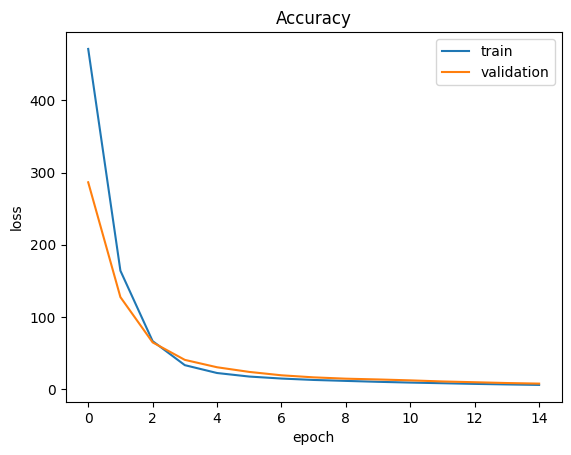

In [65]:
#Examining the model
print(f"History: {history.history.keys()}")

#Plot the metrics
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Accuracy")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

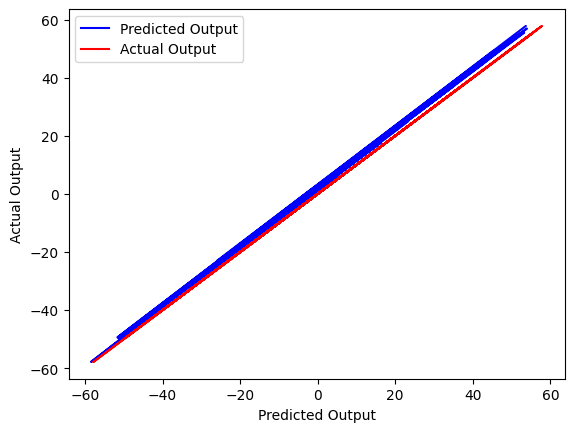

In [66]:
plt.plot(np.squeeze(model.predict_on_batch(input)), np.squeeze(z), color='blue', label='Predicted Output')
plt.plot(np.squeeze(z), np.squeeze(z), color='red', label='Actual Output')
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
plt.legend()
plt.show()


In [68]:
print(f"Pedicted set for x = 2, and y = 5:")
print(model.predict(np.array([[2, 3]])).round(2))
print("Expected Output")
print((7 * 2) + 6 * 3 + 5)

Pedicted set for x = 2, and y = 5:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[34.]]
Expected Output
37
